<a href="https://colab.research.google.com/github/KarenCruz2511/EDP/blob/main/Ejercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La solución de la ecuación
$$\frac{∂u}{∂t} = \frac{∂^2u}{∂x^2}$$
sujeta a las condiciones de frontera:
$$\frac{∂u(0,t)}{∂x} = 0,~~~\frac{∂u(1,t)}{∂x}=0,~~~t>0$$
Y la condición inicial:
$$u(x,0)= f(x),~~~ 0 < x < 1$$
Para:
$$f(x) = \left\lbrace
\begin{array}{lcc}
-2, & si & 0 < x \leq \frac{1}{2} \\
0, & si & \frac{1}{2} < x <1 \\
\end{array} \right.$$
Esta dada en términos de la serie de Fourier por la expresión:
$$ u(x,t) = -1-\sum_{n=1}^{∞} \left[\frac{4}{n\pi} \sin \left(\frac{n\pi}{2} \right) \right] \cos(n\pi x)e^{-(n\pi)^2t}$$
Este problema modela la transferencia de calor en una barra ideal delgada, con $k=1$

In [ ]:
from pylab import *

Para empezar, graficamos la condición inicial.

In [ ]:
def recta(x):
    y = zeros(len(x))
    for i in range(len(x)):
      if(x[i]<1/2):
        y[i] = -2
      if(x[i]>1/2) and (x[i]<1):
        y[i] = 0
    return y

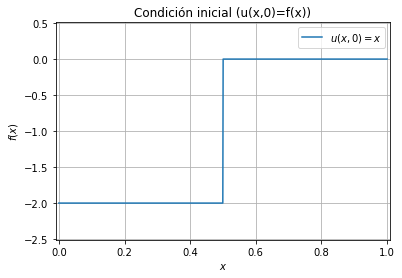

In [ ]:
x = linspace(0,1,1000)
f = recta(x)
plot(x,f,label='$u(x,0)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-0.01,1.01]),ylim([-2.51,0.51]),grid(),legend()
show()

Usamos una serie de Fourier para aproximar la condición inicial $u(x,0) = f(x)$

In [ ]:
def u_0(x,N=20): 
    f = zeros(len(x))
    for n in range(1,N):
        f += [(4/(n*pi))*sin((n*pi)/2)]*cos(n*pi*x)
    return -1-1*f

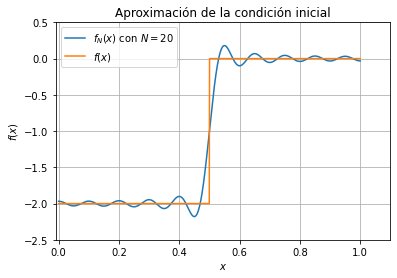

In [ ]:
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')
plot(x,f,label='$f(x)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-2.5,0.5]),grid(),legend()
show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

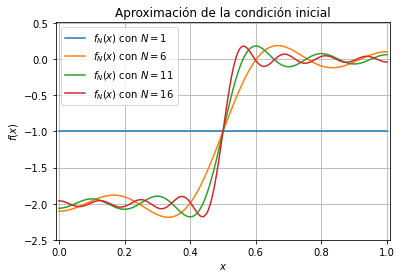

In [ ]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-2.5,0.51]),grid(),legend()
show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $t=0$

In [ ]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += [(4/(n*pi))*sin((n*pi)/2)]*cos(n*pi*x)*exp((-n**2*pi**2)*t[i])
    return -1-1*f

In [ ]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

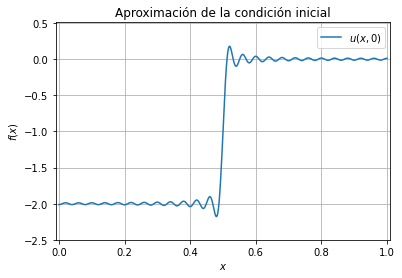

In [ ]:
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-2.5,0.51]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t ⟶ ∞$

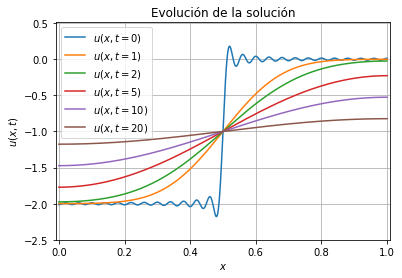

In [ ]:
plot(x,U[:,0],label='$u(x,t=0)$')
plot(x,U[:,1],label='$u(x,t=1)$')
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,5],label='$u(x,t=5)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-2.5,0.51]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

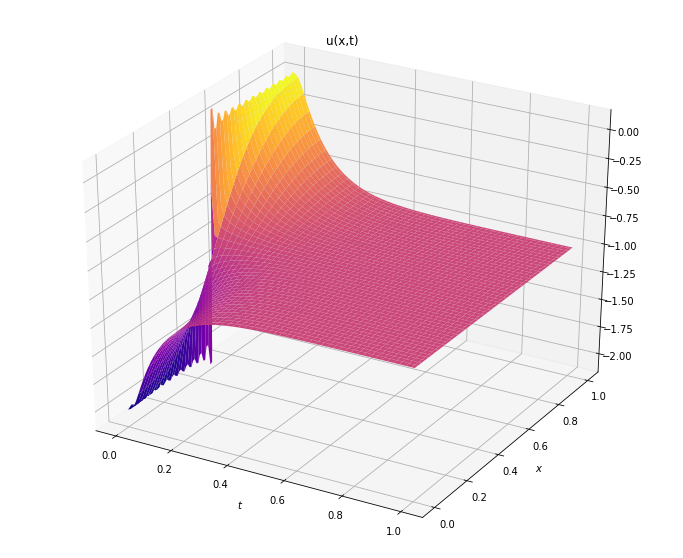

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="plasma"); 